**Just 📈 visualization + Forecasting for eur_usd from 01-01-2018 to 31-07-2020**

**import libraries** 

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.backend as K
K.clear_session()
from sklearn.preprocessing import MinMaxScaler,StandardScaler

📂 **Dataset**
upload data (u can download data from yahoo or investing)


**loading data**

In [ ]:
from google.colab import files
files.upload()

Saving EUR_USD Historical Data (4).csv to EUR_USD Historical Data (4).csv


{'EUR_USD Historical Data (4).csv': b'\xef\xbb\xbf"Date","Price","Open","High","Low","Change %"\r\n"Jan 03, 2000","1.0265","1.0052","1.0282","1.0050","1.89%"\r\n"Jan 04, 2000","1.0312","1.0244","1.0347","1.0213","0.46%"\r\n"Jan 05, 2000","1.0316","1.0295","1.0404","1.0282","0.04%"\r\n"Jan 06, 2000","1.0324","1.0325","1.0419","1.0275","0.08%"\r\n"Jan 07, 2000","1.0292","1.0327","1.0333","1.0252","-0.31%"\r\n"Jan 10, 2000","1.0257","1.0288","1.0303","1.0213","-0.34%"\r\n"Jan 11, 2000","1.0335","1.0259","1.0342","1.0241","0.76%"\r\n"Jan 12, 2000","1.0312","1.0322","1.0370","1.0258","-0.22%"\r\n"Jan 13, 2000","1.0254","1.0311","1.0320","1.0237","-0.56%"\r\n"Jan 14, 2000","1.0128","1.0261","1.0273","1.0111","-1.23%"\r\n"Jan 17, 2000","1.0118","1.0128","1.0149","1.0069","-0.10%"\r\n"Jan 18, 2000","1.0131","1.0123","1.0143","1.0072","0.13%"\r\n"Jan 19, 2000","1.0122","1.0139","1.0166","1.0086","-0.09%"\r\n"Jan 20, 2000","1.0175","1.0137","1.0189","1.0072","0.52%"\r\n"Jan 21, 2000","1.0091","1

In [ ]:
eur_usd_2y_df = pd.read_csv("EUR_USD Historical Data (4).csv")

In [ ]:
eur_usd_2y_df.head(10)

,Date,Price,Open,High,Low,Change %
0,"Jan 03, 2000",1.0265,1.0052,1.0282,1.0050,1.89%
1,"Jan 04, 2000",1.0312,1.0244,1.0347,1.0213,0.46%
2,"Jan 05, 2000",1.0316,1.0295,1.0404,1.0282,0.04%
3,"Jan 06, 2000",1.0324,1.0325,1.0419,1.0275,0.08%
4,"Jan 07, 2000",1.0292,1.0327,1.0333,1.0252,-0.31%
5,"Jan 10, 2000",1.0257,1.0288,1.0303,1.0213,-0.34%
6,"Jan 11, 2000",1.0335,1.0259,1.0342,1.0241,0.76%
7,"Jan 12, 2000",1.0312,1.0322,1.0370,1.0258,-0.22%
8,"Jan 13, 2000",1.0254,1.0311,1.0320,1.0237,-0.56%
9,"Jan 14, 2000",1.0128,1.0261,1.0273,1.0111,-1.23%


In [ ]:
eur_usd_2y_df.tail(5)

,Date,Price,Open,High,Low,Change %
4995,"Feb 25, 2019",1.1359,1.1338,1.1369,1.1323,0.14%
4996,"Feb 26, 2019",1.1387,1.1366,1.1404,1.1343,0.25%
4997,"Feb 27, 2019",1.1369,1.1396,1.1404,1.1360,-0.16%
4998,"Feb 28, 2019",1.1371,1.1371,1.1421,1.1357,0.02%
4999,"Mar 01, 2019",1.1377,1.1372,1.1410,1.1353,0.05%


**Cleaning data** 

In [ ]:
eur_usd_2y_df.fillna(method='ffill')

,Date,Price,Open,High,Low,Change %
0,"Jan 03, 2000",1.0265,1.0052,1.0282,1.0050,1.89%
1,"Jan 04, 2000",1.0312,1.0244,1.0347,1.0213,0.46%
2,"Jan 05, 2000",1.0316,1.0295,1.0404,1.0282,0.04%
3,"Jan 06, 2000",1.0324,1.0325,1.0419,1.0275,0.08%
4,"Jan 07, 2000",1.0292,1.0327,1.0333,1.0252,-0.31%
...,...,...,...,...,...,...
4995,"Feb 25, 2019",1.1359,1.1338,1.1369,1.1323,0.14%
4996,"Feb 26, 2019",1.1387,1.1366,1.1404,1.1343,0.25%
4997,"Feb 27, 2019",1.1369,1.1396,1.1404,1.1360,-0.16%
4998,"Feb 28, 2019",1.1371,1.1371,1.1421,1.1357,0.02%


**plotting the close values** 

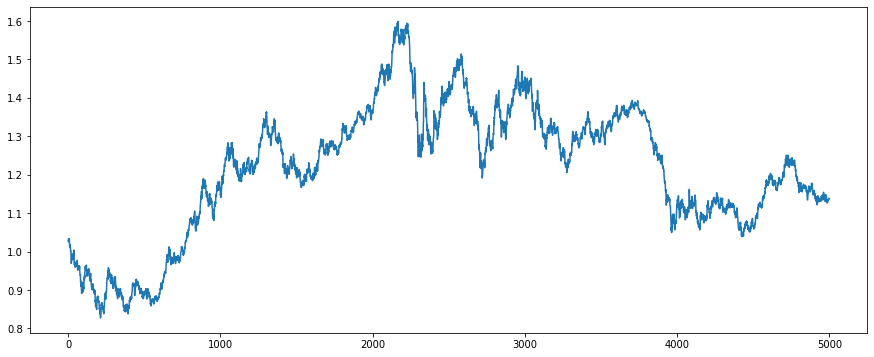

In [ ]:
eur_usd_2y_df['Price'].plot(figsize = (15, 6))
plt.show()

get label == close and columns == open,high,low

then split data to test(1-1-20 to 31-7-20) and train(1-1-18 to 1-1-20)

In [ ]:
y = X1[:].copy()
y=y.drop(["Date","Open","Change %","Low","High"],axis=1)
X = eur_usd_2y_df[:-2].copy()

X = X.drop(["Date","Price","Change %","High","Low"],axis=1)
X = X.iloc[:]

In [ ]:
len(X)

4998

In [ ]:

for cc in range(1,len(X['Open'])):
  X=X.drop(cc,axis=0)
  cc=cc+2
  if cc>694:
    break
  
X.head()

,Open
0,1.2003


In [ ]:
X.drop(1,axis=0)

,Open
0,1.2003
2,1.2058
3,1.2015
4,1.2068
5,1.2029
...,...
689,1.1860
690,1.1787
691,1.1793
692,1.1834


In [ ]:
for a in range(len(y)-1):
  y.drop([a+1],axis=0)
y.head(10)

,Price
0,1199.8
1,1204.7
2,1200.19
3,1205.6
4,1201.79
5,1195.5
6,1192.5
7,1193.51
8,1202.01
9,1217.5


In [ ]:
scaler = MinMaxScaler(feature_range = (-1, 1))
scaler_X = scaler.fit_transform(X)
#y=np.array(y)
scaler_y = scaler.fit_transform(y)

In [ ]:
X_df = pd.DataFrame(data=X, columns=["Open"],index= X.index)
y_df = pd.DataFrame(data=scaler_y, columns=["Price"],index= X.index)

In [ ]:

train_X_df = X_df[:4900]
test_X_df = X_df[4900:]

train_y_df = y_df[:4900]
test_y_df = y_df[4900:]

train_X = np.array(train_X_df)
test_X = np.array(test_X_df)

train_y = np.array(train_y_df)
test_y = np.array(test_y_df)

train_X = np.reshape(train_X,(train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X,(test_X.shape[0],1,test_X.shape[1]))

train_y = np.reshape(train_y,(train_y.shape[0]))
test_y = np.reshape(test_y,(test_y.shape[0]))

In [ ]:
print("Train X shape : ", train_X.shape)
print("Test X shape : ", test_X.shape)

print("Train y shape : ", train_y.shape)
print("Test y shape : ", test_y.shape)

Train X shape :  (4900, 1, 1)
Test X shape :  (98, 1, 1)
Train y shape :  (4900,)
Test y shape :  (98,)


**LSTM**

In [ ]:
lstm_model = keras.models.Sequential()
lstm_model.add(keras.layers.LSTM(128,
                                 input_shape=(train_X.shape[1],1),
                                 activation='relu',
                                 return_sequences=True
                                ))

lstm_model.add(keras.layers.LSTM(64,return_sequences=False,activation='relu'))

lstm_model.add(keras.layers.Dense(32,activation='relu'))
lstm_model.add(keras.layers.Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

**Model Training**

In [ ]:
history = lstm_model.fit(train_X, train_y, batch_size=128,epochs=100, verbose=1, shuffle=False)

Epoch 1/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2089
Epoch 2/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2034
Epoch 3/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2019
Epoch 4/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2020
Epoch 5/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2013
Epoch 6/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2009
Epoch 7/100
39/39 [==============================] - 0s 6ms/step - loss: 0.2007
Epoch 8/100
39/39 [==============================] - 0s 5ms/step - loss: 0.2006
Epoch 9/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2005
Epoch 10/100
39/39 [==============================] - 0s 8ms/step - loss: 0.2004
Epoch 11/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2003
Epoch 12/100
39/39 [==============================] - 0s 7ms/step - loss: 0.2002
Epoch 13/100
39/39 [=================

In [ ]:
from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_X.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(train_X, train_y, epochs = 5, batch_size = 32)

Epoch 1/5
150/150 [==============================] - 1s 8ms/step - loss: 0.2473
Epoch 2/5
150/150 [==============================] - 1s 8ms/step - loss: 0.2463
Epoch 3/5
150/150 [==============================] - 1s 8ms/step - loss: 0.2468
Epoch 4/5
150/150 [==============================] - 1s 8ms/step - loss: 0.2461
Epoch 5/5
150/150 [==============================] - 1s 8ms/step - loss: 0.2470


**📐** **Model testing**

In [ ]:
prediction = lstm_model.predict(test_X)

RMS Error of model

In [ ]:
np.sqrt(np.mean(((prediction - test_y) ** 2)))

0.0284905637844627

**prediction Visualisation**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


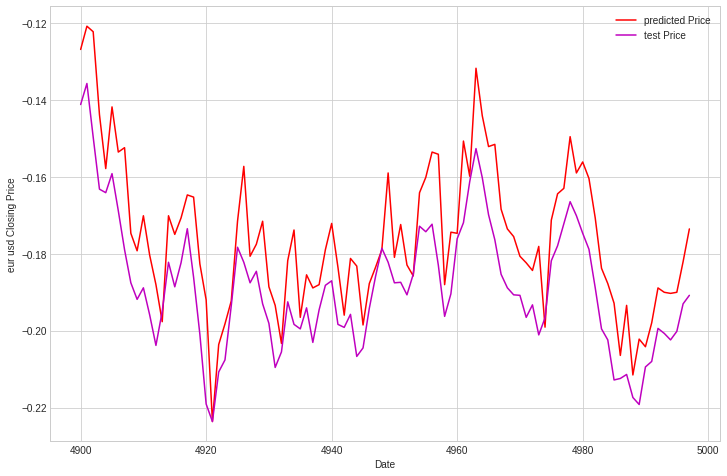

In [ ]:
test_y_df["prediction"] = np.reshape(prediction,(prediction.shape[0]))

plt.figure(figsize=(12,8))

#plt.plot(eur_usd_2y_df["10-2018":].index,nifty_50_df["10-2018":]["Close"], label="Train Price")
plt.plot(test_y_df.index,test_y_df.prediction, label="predicted Price",color='r')
plt.plot(test_y_df.index,test_y_df["Price"], label="test Price",color='m')

plt.xlabel('Date')
plt.ylabel('eur usd Closing Price')
plt.legend()
plt.show()

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lin = LinearRegression()

lin.fit(train_X, 
        train_y)
predictions_lin = lin.predict(test_X)
#predictions_lin = sc.inverse_transform(predictions_lin)
print('RMSE: {0:.3f}'.format(mean_squared_error(test_y, predictions_lin)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(test_y, predictions_lin)))
print('R^2: {0:.3f}'.format(r2_score(test_y, predictions_lin)))

RMSE: 0.006
MAE: 0.005
R^2: 0.852


In [ ]:

len(test_y)

98

In [ ]:
test_y[-2:]
true=scaler.inverse_transform(test_y.reshape(-1, 1))

In [ ]:
predictions_lin[-2:]
pred=scaler.inverse_transform(predictions_lin.reshape(-1, 1))

In [ ]:
a=(true[:]-test_X[:])/10
b=(pred[:]-test_X[:])/10
print(a)
print(b)

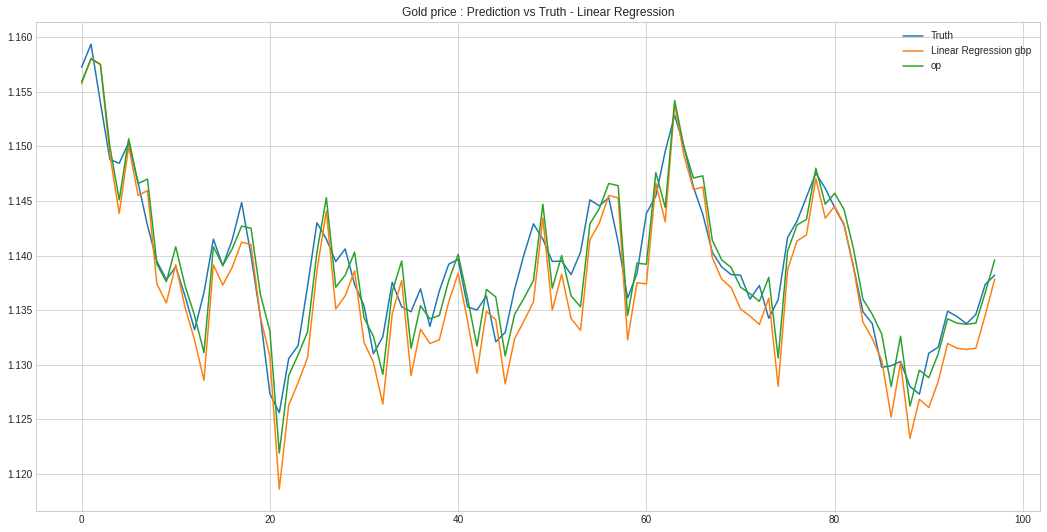

In [ ]:
plt.figure(figsize = (18,9))
plt.style.use('seaborn-whitegrid')
plot_truth, = plt.plot(true[:])
yoyo=pred[:]-0.007
op=test_X[:]
op=np.array(op)
op=op.reshape(-1,1)
plot_lin, = plt.plot(yoyo)
plot_op, = plt.plot(op)
plt.legend([plot_truth, plot_lin, plot_op], ['Truth', 'Linear Regression gbp','op'])
plt.title('Gold price : Prediction vs Truth - Linear Regression')
plt.show()


**XGBoost**





In [ ]:
import xgboost
from xgboost import XGBRegressor, DMatrix
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV, train_test_split

xgb = XGBRegressor()

data_dmatrix = DMatrix(data=train_X,label=train_y)

xgb_param_grid = {'learning_rate': [0.001, 0.01, 0.1, 1],
                  'n_estimators': [50, 100, 200, 300],
                  'subsample': [0.3, 0.5, 0.7, 1]}

grid_search = GridSearchCV(estimator=xgb,    
                        param_grid=xgb_param_grid,
                        scoring='neg_mean_squared_error', 
                        cv=4, 
                        verbose=1,
                       n_jobs=-1)

grid_search.fit(train_X, train_y) 

print("Best parameters found: ",grid_search.best_params_)

xgb_best = grid_search.best_estimator_

xgb_best.fit(train_X,train_y)
predictions_xgb = xgb_best.predict(test_X)


Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   28.8s
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed:   37.6s finished


[16:22:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameters found:  {'learning_rate': 1, 'n_estimators': 300, 'subsample': 0.5}
[16:22:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:

print('RMSE: {0:.3f}'.format(mean_squared_error(test_y, predictions_xgb)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(test_y, predictions_xgb)))
print('R^2: {0:.3f}'.format(r2_score(test_y, predictions_xgb)))

RMSE: 0.012
MAE: 0.009
R^2: 0.486


In [ ]:
predictions_lin[-2:]
predxgb=scaler.inverse_transform(predictions_xgb.reshape(-1, 1))

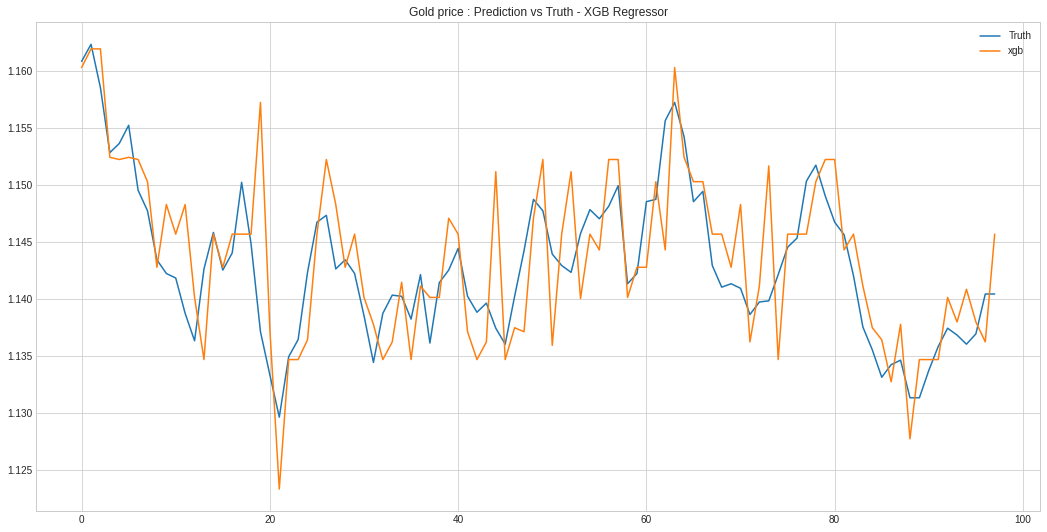

In [ ]:
plt.figure(figsize = (18,9))
plot_truth, = plt.plot(true)
plot_xgb, = plt.plot(predxgb)
plt.legend([plot_truth, plot_xgb], ['Truth', 'xgb'])
plt.title('Gold price : Prediction vs Truth - XGB Regressor')
plt.show()